In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from ml_statistical_features import load_data_as_dataframe

In [ ]:
data = load_data_as_dataframe(segment_length=10, overlap_amount=0, hr_threshold=15)

In [19]:
data.iloc[1:15]

,minimum,maximum,mean,standard deviation,range,iqr,mad,number zero crossings,kurtosis,skewness,variance local maxima,variance local minima,mean signal envelope,informative_ce,informative_hr,ecg_hr,bcg_hr,mean error,coverage,patient_id
1,-441.300589,418.670653,-0.012013,109.566497,859.971242,51.047688,37.726909,129,3.233755,0.000127,11867.050857,12542.079298,103.344882,False,False,60.0,71.760797,0.011074,30.3,27
2,-65.537668,43.288128,-0.038144,18.967748,108.825796,23.489284,17.313389,132,0.294830,-0.569472,110.976304,357.828455,18.837632,True,False,54.0,65.870197,0.007268,99.6,27
3,-69.041959,43.523798,-0.006634,19.315408,112.565757,24.964586,18.387381,134,0.298317,-0.472247,149.233774,372.308987,19.164627,True,True,54.0,55.598456,0.010061,102.5,27
4,-66.113475,47.172144,0.005047,17.933684,113.285619,21.247083,15.763501,132,0.436666,-0.401264,152.470545,292.774768,17.802031,True,True,54.0,58.355438,0.012115,102.4,27
5,-56.416927,45.941636,-0.053591,18.693785,102.358563,23.588780,17.640354,142,0.064934,-0.361447,151.713897,279.091981,18.645244,True,False,48.0,53.756030,0.011165,93.6,27
6,-172.926603,144.610727,-0.079336,34.996841,317.537330,28.926793,21.685126,138,4.340193,-0.262480,987.934461,1365.747501,32.721796,False,True,54.0,58.785108,0.013601,69.9,27
7,-58.012168,47.797053,0.049100,20.172228,105.809221,26.928393,19.951627,139,-0.128313,-0.348318,156.774248,358.178359,20.183303,False,False,54.0,64.400716,0.010938,89.0,27
8,-55.507817,48.153550,-0.008538,17.778887,103.661367,22.260279,16.587752,135,0.133694,-0.499119,114.128362,297.430012,17.667573,True,True,54.0,58.455115,0.009443,100.2,27
9,-108.578614,85.390649,-0.000478,23.762801,193.969263,28.753339,21.283750,142,1.279605,-0.193138,310.872359,410.485906,23.311178,True,False,56.0,64.148254,0.011440,95.1,27
10,-106.976651,86.172839,-0.042135,20.592580,193.149490,25.673061,19.022497,137,1.911784,-0.442725,217.855048,367.237963,20.096425,True,False,58.0,66.557912,0.014753,95.0,27


In [23]:
print("Informativ nach informative_ce: ", str(len(data[data['informative_ce']])))
print("Nicht informativ nach informative_ce: ", str(len(data) - len(data[data['informative_ce']])))

print("Informativ nach informative_hr: ", str(len(data[data['informative_hr']])))
print("Nicht informativ nach informative_hr: ", str(len(data) - len(data[data['informative_hr']])))

both_informative = [hr and ce for hr, ce in zip(data['informative_hr'], data['informative_ce'])]
print("Informativ nach beiden: ", str(len(data[both_informative])))

only_hr_informative = [hr and not ce for hr, ce in zip(data['informative_hr'], data['informative_ce'])]
print("Informativ nur nach informative_hr: ", str(len(data[only_hr_informative])))

Informativ nach informative_ce:  18670
Nicht informativ nach informative_ce:  69740
Informativ nach informative_hr:  16692
Nicht informativ nach informative_hr:  71718
Informativ nach beiden:  5405
Informativ nur nach informative_hr:  11287


In [27]:
print("Durchschnittliche Herzrate nach BKG: ", data['bcg_hr'].median())

inf_data = data[data['informative_hr']]
print("Durchschnittliche Herzrate nach BKG bei informativen Segmenten: ", inf_data['bcg_hr'].median())
print("Durchschnittliche Herzrate nach EKG bei informativen Segmenten: ", inf_data['ecg_hr'].median())

print("Durchschnittliche Herzrate nach EKG: ", data['ecg_hr'].median())

Durchschnittliche Herzrate nach BKG:  67.76821039564663
Durchschnittliche Herzrate nach BKG bei informativen Segmenten:  67.16417910447761
Durchschnittliche Herzrate nach EKG bei informativen Segmenten:  66.0
Durchschnittliche Herzrate nach EKG:  54.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9727bb1240>,
      dtype=object)

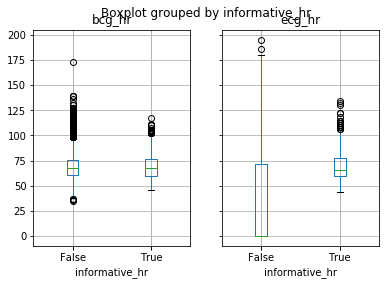

In [31]:
data.boxplot(column=['bcg_hr', 'ecg_hr'],by='informative_hr')